### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

## Step 1

### Importing data

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Step 2

### Checking Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Applying Descriptive Statistics

In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking Null Values

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Checking for Duplicate Values

In [ ]:
data[data.duplicated()]

## Step 3

### Plotting the data to check outliers

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')
plt.show()

### As you can see there are no outliers in the data

## Step 4

### Checking the Correlation between variables

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Visualization of Correlation between Feature(x) and Target(y)

### regplot = regression plot

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

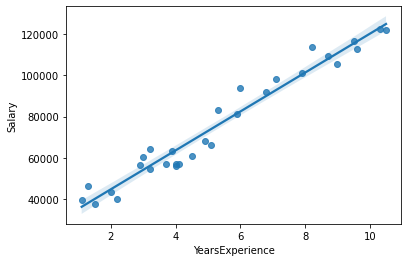

In [8]:
sns.regplot(x=data['YearsExperience'], y=data['Salary'])

### From the above plot we can say that:
#### There is a good relationship between the two variables
#### The score is also more than 0.8 which is a good sign

## Step 5

### Checking for Homoscedasticity or Hetroscedasticity

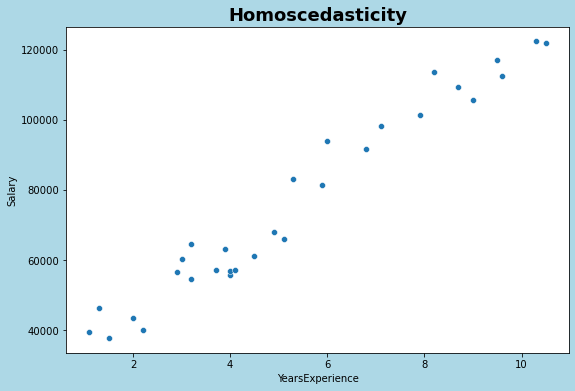

In [9]:
plt.figure(figsize = (9,6), facecolor = 'lightblue')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 18)
plt.show()

### From the above graph we can state that:
#### As the Salary increases the Years of Experience also increases with it and the variation is constant along the way in data
#### The data doesn't have any specific pattern in the variation, Hence we can say that the data is Homoscedastic

In [10]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

## Step 6

### Feature Engineering

### Trying different transformation of data to estimate normal distribution and remove any skewness

<Figure size 648x432 with 0 Axes>

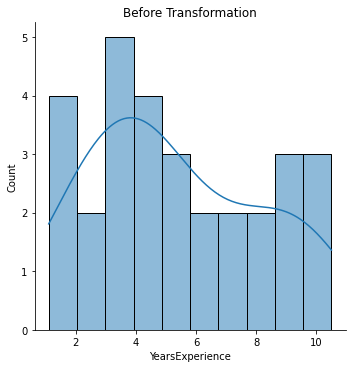

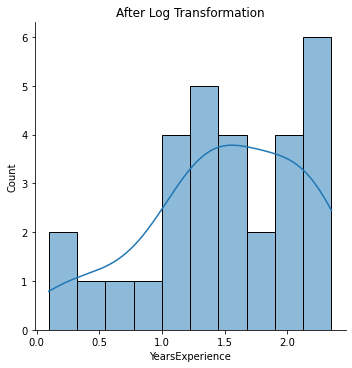

In [16]:
plt.figure(figsize = (9,6))
sns.displot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Log Transformation')
plt.show()

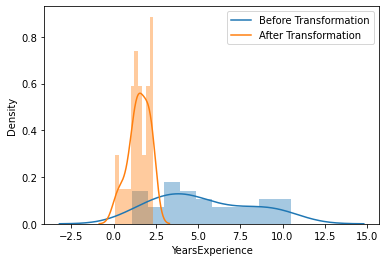

In [18]:
labels = ['Before Transformation', 'After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

### As you can see
#### How log transformation affects the data and it scales the values down.
#### Before prediction it is necessary to reverse down the scaled values, even for calculating RMSE for the models.(Errors)

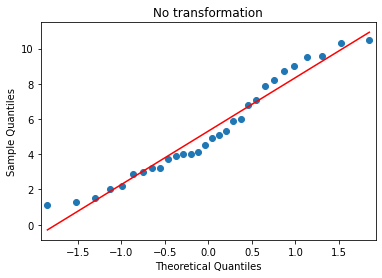

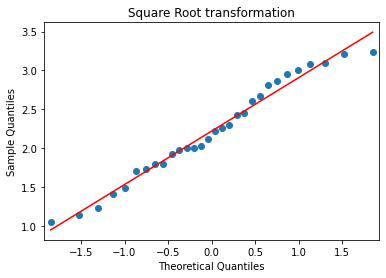

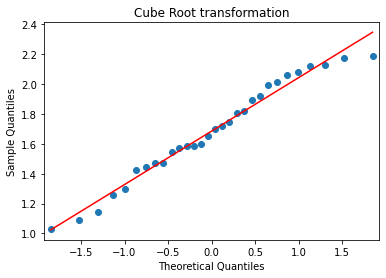

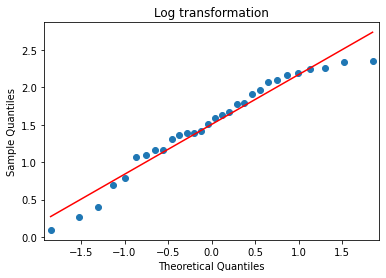

In [19]:
smf.qqplot(data['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square Root transformation')
smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube Root transformation')
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
plt.show()

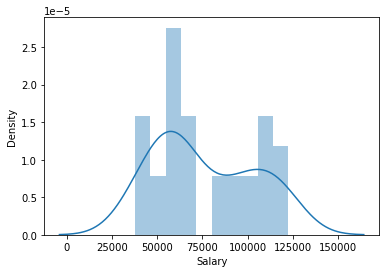

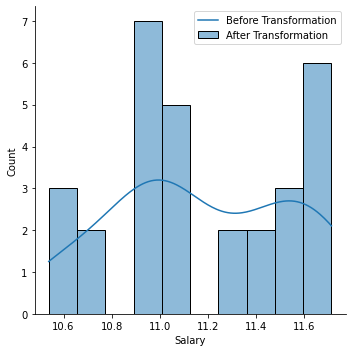

In [21]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

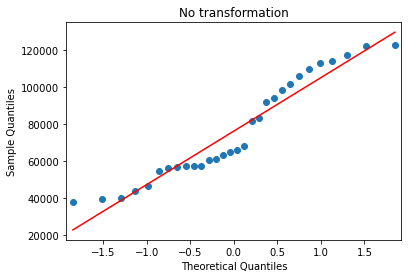

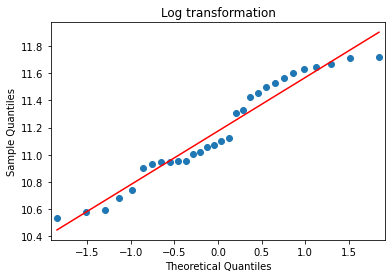

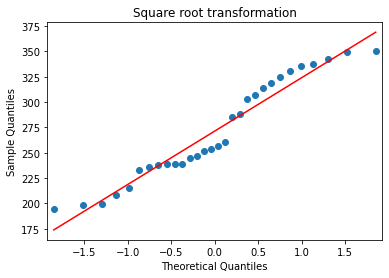

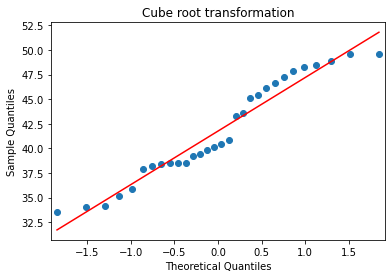

In [22]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

### Important Note:
#### We only Perform any data transformation when the data is skewed or not normal distribution 

## Step 7

### Fitting a Linear Regression Model
#### Using Ordinary least squares (OLS) regression
#### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [30]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        13:28:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As you can notice in the above model
#### The R-squared and Adjusted R-squared scores are above 0.85.
#### (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
#### F-statitics is quite high as well 
#### But log-likelihood is quite very low far away from 0
#### And AIC and BIC score are much higher for this model
#### Lets Try some data transformation to check whether these scores can get any better than this.

### Square Root tansformation on data

In [33]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           7.58e-19
Time:                        13:32:41   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cube Root transformation on data

In [34]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           6.37e-18
Time:                        13:34:06   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation on data

In [36]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        13:36:29   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From all the above transformations:
#### The R-squared and Adjusted R-squared scores are above 0.85 , which is a good sign
#### (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
#### F-statitics keeps on getting little lower as we move from Square Root to Log transformation
#### But log-likelihood got better than before in Log Transformation
#### And AIC and BIC score are now much better in Log Transformation

### Model Testing

#### As Y = Beta0 + Beta1*(X)
#### Finding Coefficient Parameters (Beta0 and Beta1 values

In [37]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

#### Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [39]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


#### (Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12
#### (daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20
#### As (pvalue=0)<(α=0.05); Reject Null hyp. Thus,X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.

### Measure goodness-of-fit by finding rsquared values (percentage of variance)
#### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

In [40]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#### Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

## Step 8

### Residual Analysis
#### Test for Normality of Residuals (Q-Q Plot)

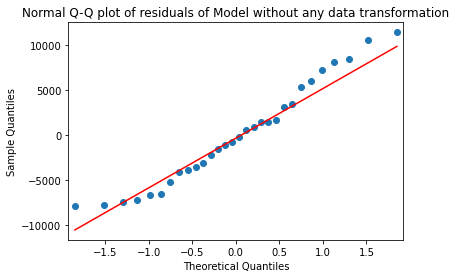

In [41]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

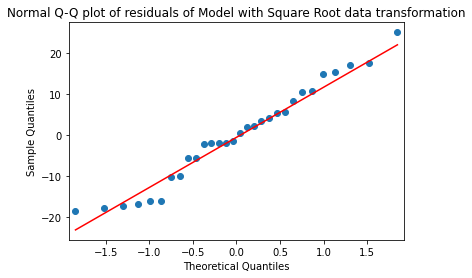

In [42]:
sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Square Root data transformation')
plt.show()

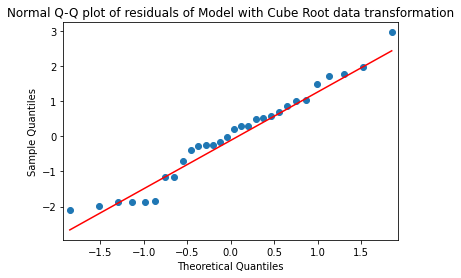

In [43]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Cube Root data transformation')
plt.show()

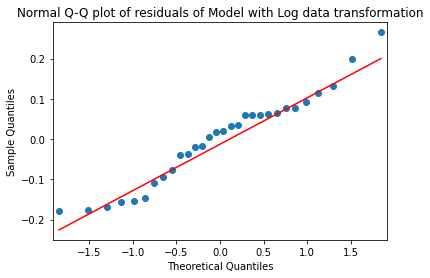

In [44]:
sm.qqplot(model3.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log data transformation')
plt.show()

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [45]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

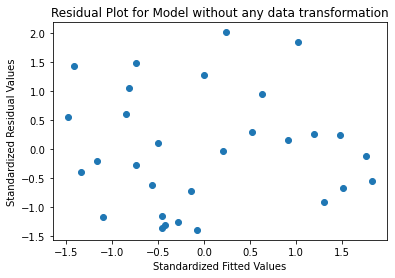

In [46]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

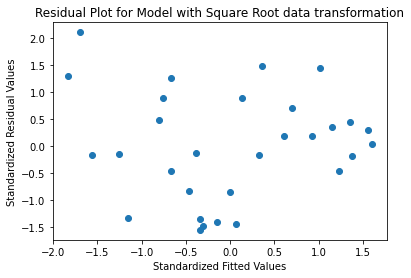

In [47]:
plt.scatter(get_standardized_values(model1.fittedvalues), get_standardized_values(model1.resid))
plt.title('Residual Plot for Model with Square Root data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

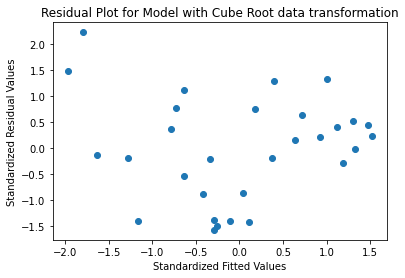

In [48]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Cube Root data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

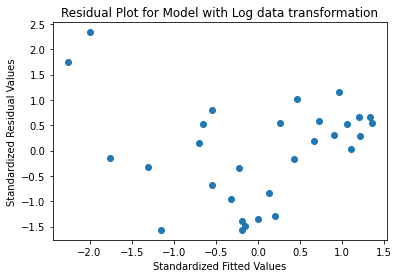

In [49]:
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title('Residual Plot for Model with Log data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### As you can notice in the above plots
#### The Models are Homoscedastic
#### The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
#### Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

## Step 9

### Model Validation

#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.
#### Comparing different models with respect to the Root Mean Squared Errors

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
model1_pred_y =np.square(model1.predict(data['YearsExperience']))
model2_pred_y =pow(model2.predict(data['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(data['YearsExperience']))

In [52]:
model1_rmse =np.sqrt(mean_squared_error(data['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119394 
model1= 5960.647096174305 
model2= 6232.815455835858 
model3= 7219.716974372787


In [53]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

### As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values
#### Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

## Step 10

### Predicting Values

In [55]:
# first model results without any transformations
predicted = pd.DataFrame()
predicted['YearsExperience'] = data.YearsExperience
predicted['Salary'] = data.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
